<a href="https://colab.research.google.com/github/Andrew1299/eda_project/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def auto_truncate(val):
    return val[:3]


df = pd.read_csv('SFBARBUOY46026h.csv', converters={'WDIR': auto_truncate})
df.head((6))

#questions to answer:
# Plot Swell height over time
# Plot Swell period on the same chart
# Plot wind speed over time
# Plot wind speed, swell height, period over time
# Find days when Swell height greater than 1.5m', period greater than 15 seconds
# Find days when Swell height greater than 1.5m', period greater than 15 seconds, and wind offshore (between 30-120 degT)
# Find days when Swell height greater than 2m', period greater than 15 seconds, winter swell (> 255)
# Find days when Swell height greater than 1m', period greater than 15 seconds, summer swell (< 255)
# Find number of days 


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#YY,MM,DD,hh,mm,WDIR,WSP,D GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,deg,m/s,m/s,m,sec,sec,deg,T hPa,degC,degC,degC,mi,ft
1,2020,1,1,0,0,320,3.7,5.3,NaN,NaN,NaN,NaN,1020.7,12.9,13,999,99,99
2,2020,1,1,0,10,318,4,5.6,NaN,NaN,NaN,NaN,1020.7,12.9,999,999,99,99
3,2020,1,1,0,20,315,4.9,7.2,NaN,NaN,NaN,NaN,1020.9,12.9,13,999,99,99
4,2020,1,1,0,30,314,5.2,6.6,NaN,NaN,NaN,NaN,1020.8,12.8,12.9,999,99,99
5,2020,1,1,0,40,317,5.5,6.8,2.11,12.9,8.1,277,1020.7,12.8,12.9,999,99,99


In [ ]:
# Clean up Data
buoyData = pd.DataFrame({'year': (df['#YY']), 'month': (df['MM']), 'day': (df['DD']), 'hour': (df['hh']), 'Wind_Direction': (df['WDIR']),
                         'Wind_Speed': (df['WSP']), 'Wind_Gusts': (df['D GST']), 'Swell_Height': (df['WVHT']), 'Swell_Period': (df['DPD']),
                         'Swell_Direction': (df['MWD']), 'Air_Temp': (df['ATMP']), 'Sea_Surface_Temp': (df['WTMP'])})
buoyDataClean = buoyData.drop([0])
buoyDataClean['date'] = pd.to_datetime(buoyDataClean[["year", "month", "day"]])
buoyDataClean.set_index('date', inplace=True)
buoyDataClean.head((6))



In [4]:
# Isolate Swell Data, remove NaN
SwellData = buoyDataClean[buoyDataClean['Swell_Height'].notna()]
#SwellData.head()

# Convert to ints
SwellData[['Swell_Height', 'Swell_Period', 'Swell_Direction', 'hour']] = SwellData[['Swell_Height', 'Swell_Period', 'Swell_Direction', 'hour']].apply(pd.to_numeric)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Text(0.5, 1.0, 'Surf Height and Period 2020')

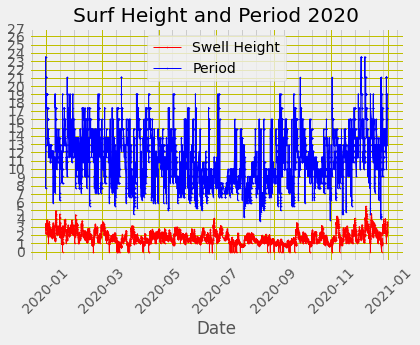

In [33]:
# Plot Swell height over time
plt.style.use('fivethirtyeight')
swellPlot = (plt.plot(SwellData['Swell_Height'], marker = ".", markersize = 1, linewidth = 1, color = 'r', label = 'Swell Height'),
             plt.plot(SwellData['Swell_Period'], marker = ".", markersize = 1, linewidth = 1, color = 'b', label = 'Period'))


plt.xticks(rotation = 45)
y_ticks = np.arange(0, 28, 1)
plt.yticks(y_ticks)
plt.minorticks_on()
plt.grid(True, color='y', linestyle='-')
plt.grid(True, which='minor', axis='x')
#plt.figure(figsize=(20, 3))

plt.xlabel('Date')
plt.legend()
#plt.grid(True, which = 'major', color='y', linestyle='-')
plt.title('Surf Height and Period 2020')




In [5]:
# Find times when Swell height greater than 1.5 meters, period greater than 15 seconds
df = SwellData[(SwellData['Swell_Height'] > 1.5) & (SwellData['Swell_Period'] > 14) & (SwellData['hour']==0) ]
df[['Swell_Height', 'Swell_Period']]

,Swell_Height,Swell_Period
date,,
2020-01-02,2.75,19.05
2020-01-03,3.30,17.39
2020-01-12,4.45,17.39
2020-01-20,2.78,14.81
2020-01-21,2.26,17.39
2020-01-22,3.66,16.00
2020-01-25,2.65,19.05
2020-01-26,2.82,14.81
2020-01-27,2.40,16.00


In [6]:
# Find times when Swell is pumping (height > 2m, period > 15 sec) and is a Winter swell ((> 255))
df = SwellData[(SwellData['Swell_Height'] > 2) & (SwellData['Swell_Period'] > 14) & (SwellData['hour']==0) & (SwellData['Swell_Direction']>255)]
df[['Swell_Height', 'Swell_Period']]

,Swell_Height,Swell_Period
date,,
2020-01-02,2.75,19.05
2020-01-12,4.45,17.39
2020-01-20,2.78,14.81
2020-01-21,2.26,17.39
2020-01-22,3.66,16.00
2020-01-25,2.65,19.05
2020-01-26,2.82,14.81
2020-01-27,2.40,16.00
2020-01-30,2.77,14.81


In [7]:
# Find times when Swell is pumping (height > 1m, period > 15 sec) and is a Summer swell ((< 255))
df = SwellData[(SwellData['Swell_Height'] > 1) & (SwellData['Swell_Period'] > 14) & (SwellData['hour']==0) & (SwellData['Swell_Direction']<255)]
df[['Swell_Height', 'Swell_Period']]

,Swell_Height,Swell_Period
date,,
2020-02-27,1.35,19.05
2020-03-18,1.05,17.39
2020-03-19,1.07,16.00
2020-04-08,1.42,19.05
2020-04-09,1.44,16.00
2020-04-10,1.31,16.00
2020-04-11,1.21,14.81
2020-05-29,1.15,16.00
2020-06-10,1.10,17.39


In [8]:
# Find days when wind is good for surfing and surf is decent
# Fix data into int
SwellData[['Wind_Direction', 'Wind_Speed', 'Wind_Gusts']] = SwellData[['Wind_Direction', 'Wind_Speed', 'Wind_Gusts']].apply(pd.to_numeric)

# Find days when surf is at least 1m at 14 seconds and wind is less than 5 knots
df = SwellData[(SwellData['Swell_Height'] > 1) & (SwellData['Swell_Period'] > 14) & (SwellData['hour']==0)
 & (SwellData['Wind_Speed']<5) & (SwellData['Wind_Gusts']<5) ]
df[['Swell_Height', 'Swell_Period', 'Wind_Speed', 'Wind_Gusts']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Swell_Height,Swell_Period,Wind_Speed,Wind_Gusts
date,,,,
2020-01-25,2.65,19.05,2.2,3.6
2020-02-27,1.35,19.05,3.0,3.7
2020-03-18,1.05,17.39,2.8,3.8
2020-03-23,1.49,17.39,2.4,3.4
2020-04-09,1.44,16.00,3.8,4.9
2020-04-10,1.31,16.00,2.7,3.8
2020-06-24,1.08,16.00,1.2,1.9
2020-09-30,1.61,14.81,1.7,2.5
2020-10-11,1.13,14.81,1.9,2.7


In [9]:
# Find days when wind is offshore (between 30-120 degT)
#SwellData[(SwellData['Wind_Direction'] > 30) & (SwellData['Wind_Direction'] < 120) & (SwellData['hour']==7)]

# Find days when wind is offshore and surf is good (at least 1m at 14 sec)
df = SwellData[(SwellData['Swell_Height'] > 1) & (SwellData['Swell_Period'] > 14) & (SwellData['Wind_Direction'] > 30) & 
          (SwellData['Wind_Direction'] < 120) & (SwellData['hour']==7)]

df[['Swell_Height', 'Swell_Period', 'Wind_Direction']]


,Swell_Height,Swell_Period,Wind_Direction
date,,,
2020-01-19,1.74,17.39,80
2020-12-04,2.90,17.39,39


[]

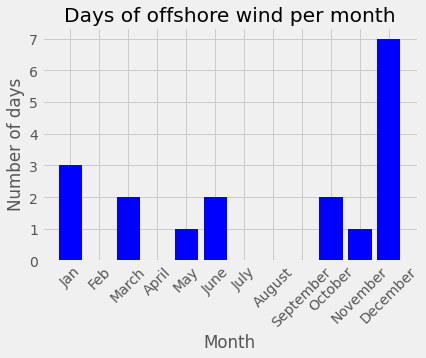

In [30]:
# Find number of days each month when wind is blowing offshore and display as bar chart (between 30-120 degrees)
offshoreDays = []
for i in range(1, 13):
  dayCount = len(SwellData[(SwellData['Wind_Direction'] > 30) & (SwellData['Wind_Direction'] < 120) & (SwellData['hour']==7) & (SwellData['month']== i)])
  offshoreDays.append(dayCount)
  i+1

months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#plt.style.use('fivethirtyeight')
plt.bar(months, offshoreDays, label='Days wind offshore', color='b')
plt.xticks(rotation = 45)
plt.title('Days of offshore wind per month')
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.plot()

[]

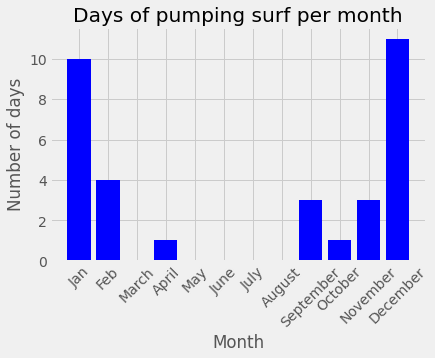

In [29]:
# Find number of days each month when surf is pumping (greater than 1.5m at 15 sec) and display as bar chart
pumpingDays = []
for i in range(1, 13):
  dayCount = len(SwellData[(SwellData['Swell_Height'] > 1.5) & (SwellData['Swell_Period'] > 14) & (SwellData['hour']==0) & (SwellData['month']== i)])
  pumpingDays.append(dayCount)
  i+1

months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.bar(months, pumpingDays, color='b')
plt.xticks(rotation = 45)
plt.title('Days of pumping surf per month')
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.plot()

Text(0.5, 1.0, '2020 Wind Speed trends')

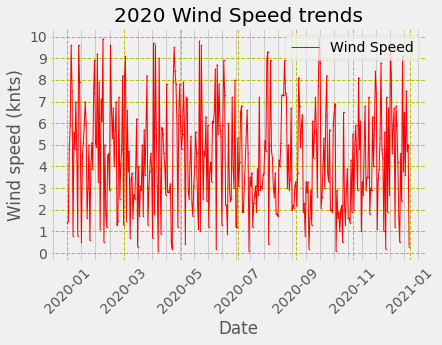

In [22]:
# Plot wind
# Measure at 7 am every day
WindData = SwellData[(SwellData['hour']==7)]
#WindPlot = (plt.plot(SwellData['Wind_Speed'], marker = ".", markersize = 1, color = 'r', label = 'Wind Speed'),
             #plt.plot(SwellData['Wind_Gusts'], marker = ".", markersize = 1, color = 'b', label = 'Gusts'))
WindPlot = (plt.plot(WindData['Wind_Speed'], marker = ".", markersize = 1, linewidth = 1, color = 'r', label = 'Wind Speed'))

plt.xticks(rotation = 45)
y_ticks = np.arange(0, 11, 1)
plt.yticks(y_ticks)
plt.minorticks_on()
plt.grid(True, color='y', linestyle='-')
plt.grid(True, which='minor', axis='x')

plt.xlabel('Date')
plt.ylabel('Wind speed (knts)')
plt.legend()
plt.grid(True, which = 'major', color='y', linestyle='--')
plt.title('2020 Wind Speed trends')



Text(0.5, 1.0, 'OBSF December 2020 Surf and Wind, SF Bar Buoy 46026')

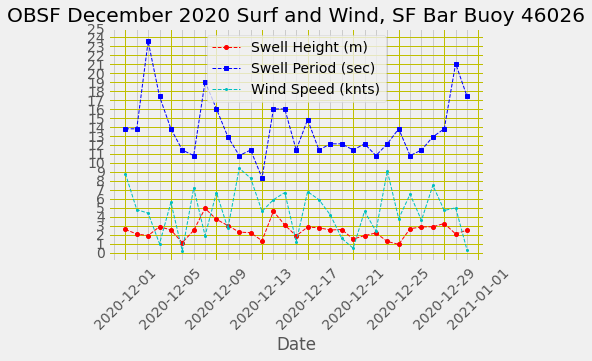

In [32]:
# Plot Swell, Period, Wind for the month of January

SwellData=SwellData.apply(pd.to_numeric)
December = SwellData[(SwellData['month']==12) & (SwellData['hour']==7)]

DecemberSurf = (plt.plot(December['Swell_Height'], marker = "o", linestyle = '--', linewidth = 1, markersize = 4, color = 'r', label = 'Swell Height (m)'),
             plt.plot(December['Swell_Period'], marker = "s", linestyle = '--', linewidth = 1, markersize = 4, color = 'b', label = 'Swell Period (sec)'),
             plt.plot(December['Wind_Speed'], marker = ".", linestyle = '--', linewidth = 1, markersize = 4, color = 'c', label = 'Wind Speed (knts)'))

plt.xticks(rotation = 45)
y_ticks = np.arange(0, 26, 1)
plt.yticks(y_ticks)
plt.minorticks_on()
plt.grid(True, color='y', linestyle='-')
plt.grid(True, which='minor', axis='x')
plt.xlabel('Date')
plt.legend()
plt.title('OBSF December 2020 Surf and Wind, SF Bar Buoy 46026')



Text(0.5, 1.0, 'OBSF July 2020 Surf and Wind, SF Bar Buoy 46026')

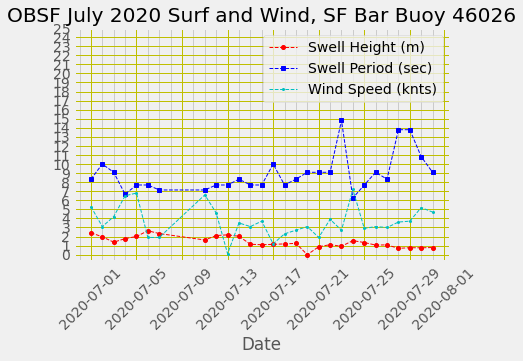

In [34]:
# Plot Swell, Period, Wind for the month of July

SwellData=SwellData.apply(pd.to_numeric)
July = SwellData[(SwellData['month']==7) & (SwellData['hour']==7)]

JulySurf = (plt.plot(July['Swell_Height'], marker = "o", linestyle = '--', linewidth = 1, markersize = 4, color = 'r', label = 'Swell Height (m)'),
             plt.plot(July['Swell_Period'], marker = "s", linestyle = '--', linewidth = 1, markersize = 4, color = 'b', label = 'Swell Period (sec)'),
             plt.plot(July['Wind_Speed'], marker = ".", linestyle = '--', linewidth = 1, markersize = 4, color = 'c', label = 'Wind Speed (knts)'))

plt.xticks(rotation = 45)
y_ticks = np.arange(0, 26, 1)
plt.yticks(y_ticks)
plt.minorticks_on()
plt.grid(True, color='y', linestyle='-')
plt.grid(True, which='minor', axis='x')
plt.xlabel('Date')
plt.legend()
plt.title('OBSF July 2020 Surf and Wind, SF Bar Buoy 46026')
